In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Kenil Ramani\QB\GoalBot\CSV\dataset_v4.04.csv')

In [3]:
# df = df[df['productId'].notna()]

In [4]:
# df['invoiceDate'] = pd.to_datetime(df['invoiceDate'], errors='coerce')
# df['amount'] = df['amount'].round().astype('int64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129176 entries, 0 to 129175
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   salesId                    129176 non-null  int64  
 1   invoiceId                  129176 non-null  object 
 2   invoiceDate                129176 non-null  object 
 3   quarter                    129176 non-null  int64  
 4   month                      129176 non-null  int64  
 5   year                       129176 non-null  int64  
 6   day_of_week                129176 non-null  int64  
 7   day_of_month               129176 non-null  int64  
 8   day_of_year                129176 non-null  int64  
 9   week_of_year               129176 non-null  int64  
 10  stockistId                 103457 non-null  float64
 11  chemistId                  25719 non-null   object 
 12  billAmount                 129176 non-null  int64  
 13  salesDetails_Id            12

In [6]:
# ##1
# # Step 1: Ensure proper date format
# df['invoiceDate'] = pd.to_datetime(df['invoiceDate'], dayfirst=True, errors='coerce')

# # Step 2: Filter desired date range
# date_range = pd.date_range(start='2021-01-01', end='2024-12-31')

# # Step 3: Aggregate sum of qty and amount per date
# df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
# df['qty'] = pd.to_numeric(df['qty'], errors='coerce')
# daily_sum = df.groupby('invoiceDate').agg(
#     total_qty=('qty', 'sum'),
#     total_amount=('amount', 'sum')
# )

# # Step 4: Reindex to include all dates with 0 fill
# full_daily = daily_sum.reindex(date_range, fill_value=0)
# full_daily.index.name = 'Date'

# # Step 5: Plotting
# plt.figure(figsize=(20, 8))
# plt.plot(full_daily.index, full_daily['total_qty'], label='Total Quantity', color='blue')
# plt.plot(full_daily.index, full_daily['total_amount'], label='Total Amount', color='orange')

# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.title('Daily Total Quantity and Amount (2021–2024)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()

# # Optional: Improve x-tick spacing (e.g., show one tick per 3 months)
# plt.xticks(pd.date_range(start='2021-01-01', end='2024-12-31', freq='3MS'), rotation=90)

# plt.show()


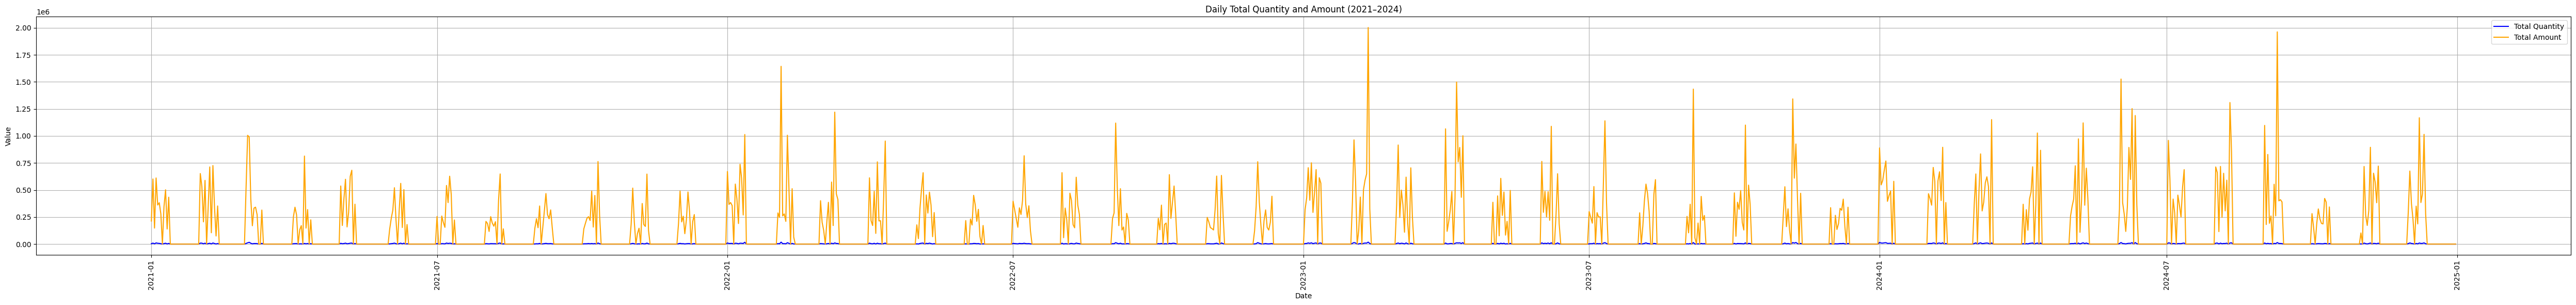

In [7]:
# 02
# Step 1: Convert to datetime
df['invoiceDate'] = pd.to_datetime(df['invoiceDate'], dayfirst=True, errors='coerce')

# Step 2: Filter and convert numeric columns
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['qty'] = pd.to_numeric(df['qty'], errors='coerce')

# Step 3: Create full date range and aggregate
date_range = pd.date_range(start='2021-01-01', end='2024-12-31')
daily_sum = df.groupby('invoiceDate').agg(
    total_qty=('qty', 'sum'),
    total_amount=('amount', 'sum')
)

# Step 4: Reindex to full date range with 0 fill
full_daily = daily_sum.reindex(date_range, fill_value=0)
full_daily.index.name = 'Date'

# Step 5: Plot with wide figure and all x-ticks
plt.figure(figsize=(50, 6))  # wide for scrolling
plt.plot(full_daily.index, full_daily['total_qty'], label='Total Quantity', color='blue')
plt.plot(full_daily.index, full_daily['total_amount'], label='Total Amount', color='orange')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Daily Total Quantity and Amount (2021–2024)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
